


# Project: Investigate a Dataset - [TMDb]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


> This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
**The column Names:**
- id
- imdb_id
- popularity
- budget
- revenue
- original_title
- cast
- homepage
- director
- tagline
- keywords
- overview
- runtime
- genres
- production_companies
- release_date
- vote_count
- vote_average
- release_year
- budget_adj
- revenue_adj


### Question(s) for Analysis


- what kinds of factors that increases the rating of a movie? 
- Does the budget of the movie affect its revenue ?



In [224]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline



In [225]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==1.1.5

Requirement already up-to-date: pandas==1.1.5 in /opt/conda/lib/python3.6/site-packages (1.1.5)


#### DEFINING SOME FUNCTION TO BE USED 

In [226]:
#A function finds the top rated category (director, company, actor ....)
#it takes the index and the name of the column in the original dataframe
#When the column has more than a value we use the first one only (see limitations)
def best_ratings (df, indx, col):
    new_df = df.iloc[:,np.r_[indx, 16]]
    exec("new_df[col] = pd.DataFrame(new_df."+col+".str.split('|').str[0])")   
    return new_df.groupby([col])['vote_average'].mean().reset_index().sort_values('vote_average',ascending=False).head(10)

In [227]:
#finction to plot the scatter plot between the revenue and other fields
def plot_with_revenue (field, indx):
    ax = df.iloc[:,np.r_[indx, 19]].plot(x=field,y='revenue_adj',kind='scatter', figsize=(8,8),title = field +' vs revenues')
    ax.set_xlabel(field)
    ax.set_ylabel("Revenues")

<a id='wrangling'></a>
## Data Wrangling




In [228]:
# Loading the data 
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')


In [229]:
#the shape of the data
df.shape

(10866, 21)

In [230]:
#column names 
for i in df.columns:
    print(i)

id
imdb_id
popularity
budget
revenue
original_title
cast
homepage
director
tagline
keywords
overview
runtime
genres
production_companies
release_date
vote_count
vote_average
release_year
budget_adj
revenue_adj



### Data Cleaning

 

In [231]:
#df.nunique()

#### Finding the info about the columns to check the datatypes

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### we found that release_date is stored as an object so we need to change its datatype to datetyoe

In [233]:
#change release_date to datetime dt
df['release_date'] = pd.to_datetime(df['release_date'])

#### checking for duplicate rows and delete them if any

In [234]:
#check for duplicated records
sum(df.duplicated())

1

In [235]:
df.drop_duplicates(inplace=True)

In [236]:
sum(df.duplicated())

0

#### checking for missing data 

In [237]:
df.isnull().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### We found that homepage has alot of null values and we don't need this columns in our questions so we can ignore it

In [238]:
#remove home page ... not needed
df = df.iloc[:, np.r_[0:7,8:21]]

#### And drop the null values for other important columns

In [239]:
df.dropna(subset=['imdb_id', 'director','cast','production_companies','genres'],inplace=True)

In [240]:
df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
tagline                 2136
keywords                1106
overview                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [241]:
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9770.000000,9770.000000,9.770000e+03,9.770000e+03,9770.000000,9770.000000,9770.000000,9770.000000,9.770000e+03,9.770000e+03
mean,63190.584033,0.694775,1.618298e+07,4.424026e+07,102.939611,239.353224,5.963388,2000.876766,1.941997e+07,5.706477e+07
std,90725.204030,1.037027,3.221320e+07,1.225998e+08,27.865500,603.066348,0.913207,13.037610,3.566891e+07,1.514632e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10220.500000,0.232619,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18677.500000,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.179631e+05,0.000000e+00
75%,70541.750000,0.776465,1.936250e+07,3.105779e+07,112.000000,173.000000,6.600000,2011.000000,2.467646e+07,4.312856e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [242]:
df.loc[(df==0).any(axis=1)]


,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,The man behind the myth,london|detective|sherlock holmes,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,"A serial killer who can see your future, a psy...",thriller|serial killer|psychic|fbi agent|intrigue,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,Never bet against a man with a killer hand.,gambling|bodyguard|remake,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,481,5.3,2015,2.759999e+07,0.000000e+00
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,His Next Target is Now Hunting Him,new year's eve|fire|showdown|terrorist|embassy,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015,1.839999e+07,0.000000e+00
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,NaN,desert|hunting,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,2015-04-17,81,5.5,2015,0.000000e+00,4.222338e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,0.000000e+00


#### We notice that budget and revenue has lots of 0 values and it is not possible...
#### Lets drop them !!

In [243]:
df = df.loc[(df['budget']!=0)]
df = df.loc[(df['revenue']!=0)]

In [197]:
#checking for sum of null values again
df.isnull().sum()

id                        0
imdb_id                   0
popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                  0
tagline                 261
keywords                128
overview                  0
runtime                   0
genres                    0
production_companies      0
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64

#### Let's see if there are outliers

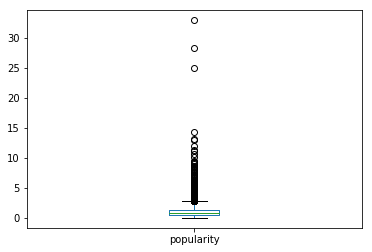

In [247]:
df['popularity'].plot(kind='box')


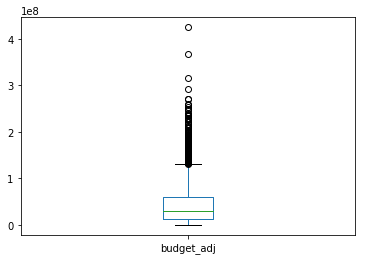

In [248]:
df['budget_adj'].plot(kind='box')


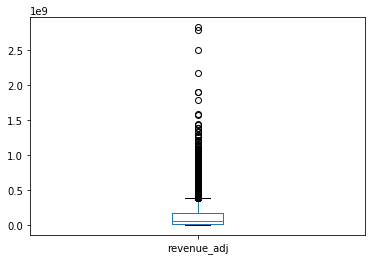

In [249]:
df['revenue_adj'].plot(kind='box')


#### We found outliers. lET'S REOMOVE THEM.

In [250]:
df = df[np.abs(df.budget_adj-df.budget_adj.mean()) <= (3*df.budget_adj.std())]
df = df[np.abs(df.revenue_adj-df.revenue_adj.mean()) <= (3*df.revenue_adj.std())]
df = df[np.abs(df.popularity-df.popularity.mean()) <= (3*df.popularity.std())]

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3604 entries, 23 to 10848
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3604 non-null   int64         
 1   imdb_id               3604 non-null   object        
 2   popularity            3604 non-null   float64       
 3   budget                3604 non-null   int64         
 4   revenue               3604 non-null   int64         
 5   original_title        3604 non-null   object        
 6   cast                  3604 non-null   object        
 7   director              3604 non-null   object        
 8   tagline               3346 non-null   object        
 9   keywords              3476 non-null   object        
 10  overview              3604 non-null   object        
 11  runtime               3604 non-null   int64         
 12  genres                3604 non-null   object        
 13  production_compa

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (Who has the hgighest ratings ?)

In [252]:
#find the top rated directors, genrs and companies and stored them in new dataframes)

directors_df = best_ratings (df, 7, 'director')
genres_df = best_ratings (df, 12, 'genres')
companies_df = best_ratings (df, 13, 'production_companies')


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [253]:
companies_df

,production_companies,vote_average
759,Talking Heads,8.4
107,Blue Parrot Productions,8.0
249,Element Pictures,8.0
704,Shamley Productions,8.0
568,O2 Filmes,7.8
827,Vidhu Vinod Chopra Productions,7.8
591,Pan EuropÃ©enne Production,7.8
46,Annapurna Pictures,7.8
812,UTV Motion Pictures,7.8
707,Shaw Brothers,7.7


#### we noticed that Talking Heads company has highest average rating


In [254]:
genres_df

,genres,vote_average
5,Documentary,6.765217
4,Crime,6.437576
13,Romance,6.431746
6,Drama,6.423509
17,War,6.405882
9,History,6.400000
18,Western,6.366667
2,Animation,6.276471
11,Music,6.193103
14,Science Fiction,6.192941


#### we noticed that Documentary genre has highest average rating

In [255]:
directors_df

,director,vote_average
886,Lenny Abrahamson,8.0
1585,Xavier Dolan,8.0
1530,Tony Kaye,8.0
797,Josh Boone,7.8
590,Jaco Van Dormael,7.8
107,Ashutosh Gowariker,7.8
1190,Rajkumar Hirani,7.8
909,Lucy Walker,7.8
1303,Ronald Neame,7.7
1269,Robert Mulligan,7.7


#### we noticed that director Damien Chazelle has highest average rating


### Research Question 2  (what factors affect the revenue ?)

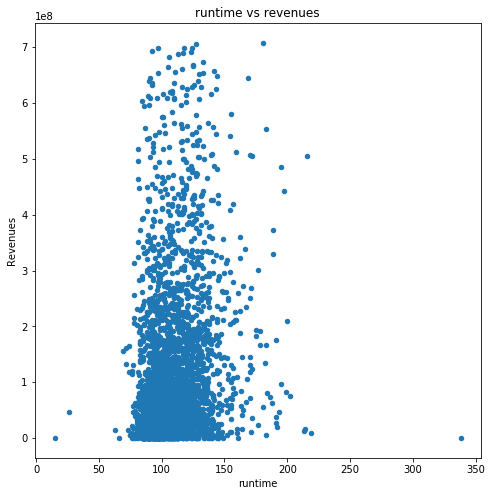

In [256]:
plot_with_revenue("runtime", 11)

#### no correlation between runtime of the movie and its revenues

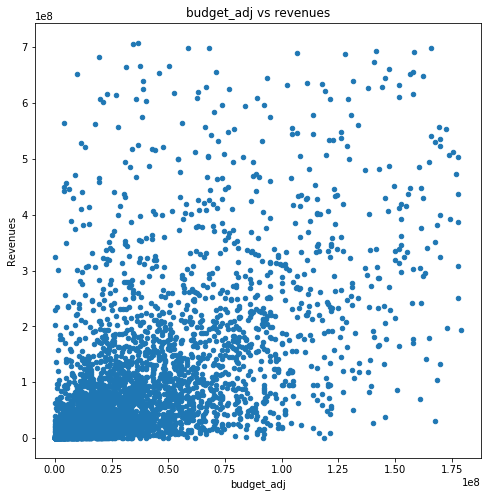

In [257]:
plot_with_revenue("budget_adj", 18)

#### there is a positive correlation but very week between budget and revenues

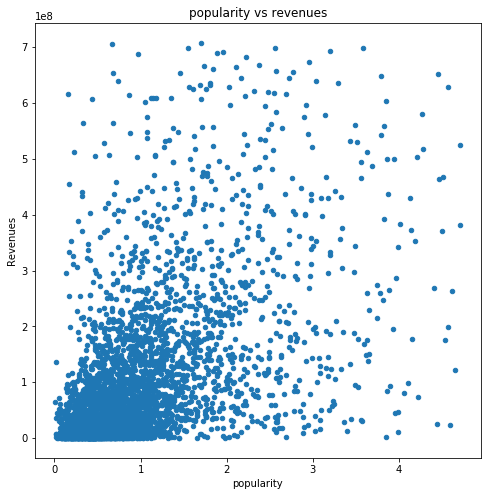

In [258]:
plot_with_revenue("popularity", 2)

#### there is a positive correlation but very week between popularity and revenues

<a id='conclusions'></a>
## Conclusions


- We found out that the Documentary movies,Talking Heads	company, Director : Lenny Abrahamson	have the highest ratings.
some additional work we can do is to also see who are the top actors regarding to ratings.

- We found out that the revenue doesn't depend on the runtime of the movie and deped on the budget and popularity of the movie with a week positive correlation

### Limitations

- We have a limitation that we used the first movie genre and considered it as the only genre for the movie. also we considered only the first production company and first director


## Submitting your Project 



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])